In [1]:
import math
import numpy as np
from matplotlib import pyplot as pt
%matplotlib inline

# Complex numbers in Python

In [2]:
a = 3
b = 3
z = a + b * 1j
print('z = ', z)
print('The type of the variable is ', type(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>


In [3]:
(2.75+3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

In [4]:
1.4*np.exp(5.32*1j)

(0.79927078585823497-1.1494199453957457j)

In [5]:
(7.51-9.15*1j)/(4.43+9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

# Shapes created by the Joukowski transformation

In [6]:
#using polar coordinate for r & theta
theta = np.linspace(0,2*np.pi, 100)
R = 1.5
c = 1
z = R*np.exp(theta*1j)
xi = z+c**2/z

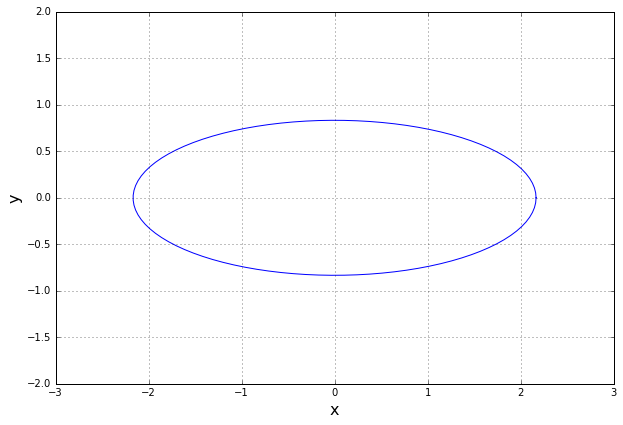

In [7]:
size = 10
x_start, x_end = -3, 3
y_start, y_end = -2, 2
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It becomes an ellipse on xi plane.

In [8]:
R = 1.2
c = 1
z = (c-R+R*np.cos(theta) + R*1j*np.sin(theta))
#circle centered at (c−R,0)
xi = z+c**2/z

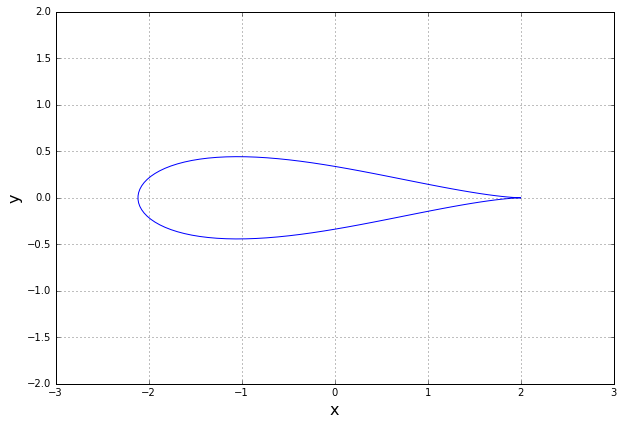

In [9]:
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It now becomes a symmetric airfoil.

In [10]:
delta_x = 0.1
delta_y = 0.1
c = 1
R = math.sqrt((c-delta_x)**2 + delta_y**2)
z = (-delta_x+R*np.cos(theta) + (delta_y+R*np.sin(theta))*1j)
#circle centered at (-delta_x,delta_y)
xi = z+c**2/z

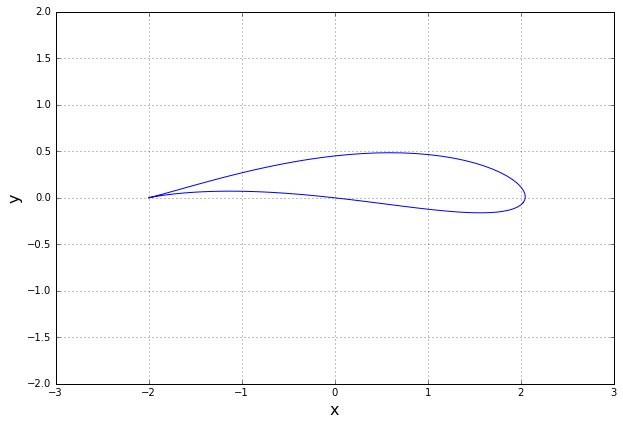

In [11]:
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlabel('x', fontsize=16)
pt.ylabel('y', fontsize=16)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.plot(xi.real, xi.imag)

It now looks like a cambered airfoil.

# Grid points on the z-plane using polar coordinates

In [12]:
Nr = 100
Ntheta = 145
R = 1.15
c = 1
r = np.linspace(c, 5, Nr)
theta = np.linspace(0, 2*np.pi, Ntheta)
RR, THETA = np.meshgrid(r, theta)
z = (-0.15+RR*np.cos(THETA) + RR*1j*np.sin(THETA)) + 0.15*np.exp(THETA*1j)
#cylinder centered at (−0.15,0)

array([[ 1.00000000 +0.00000000e+00j,  1.04040404 +0.00000000e+00j,
         1.08080808 +0.00000000e+00j, ...,  4.91919192 +0.00000000e+00j,
         4.95959596 +0.00000000e+00j,  5.00000000 +0.00000000e+00j],
       [ 0.99890545 +5.01622955e-02j,  1.03927104 +5.19246950e-02j,
         1.07963662 +5.36870944e-02j, ...,  4.91436717 +2.21115046e-01j,
         4.95473276 +2.22877445e-01j,  4.99509834 +2.24639845e-01j],
       [ 0.99562390 +1.00229104e-01j,  1.03587419 +1.03750548e-01j,
         1.07612448 +1.07271992e-01j, ...,  4.89990211 +4.41809187e-01j,
         4.94015240 +4.45330631e-01j,  4.98040270 +4.48852075e-01j],
       ..., 
       [ 0.99562390 -1.00229104e-01j,  1.03587419 -1.03750548e-01j,
         1.07612448 -1.07271992e-01j, ...,  4.89990211 -4.41809187e-01j,
         4.94015240 -4.45330631e-01j,  4.98040270 -4.48852075e-01j],
       [ 0.99890545 -5.01622955e-02j,  1.03927104 -5.19246950e-02j,
         1.07963662 -5.36870944e-02j, ...,  4.91436717 -2.21115046e-01j,
      

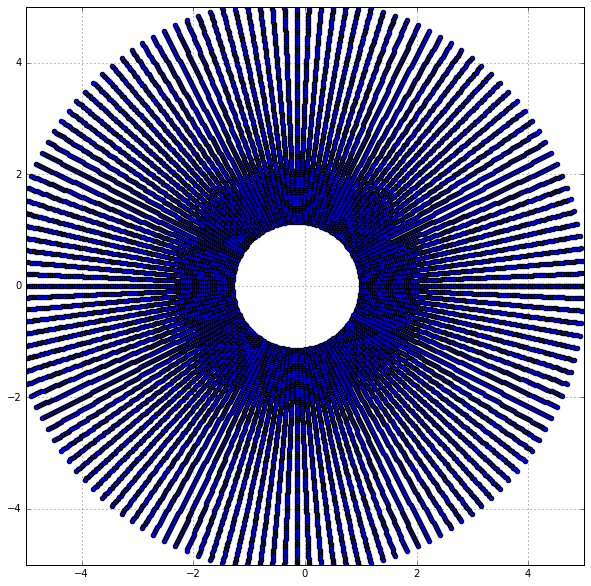

In [21]:
#plot the grids on z plane
size = 10
x_start, x_end = -5, 5
y_start, y_end = -5, 5
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.scatter(z.real, z.imag)
#z.real & z.imag represent the grid points now
z

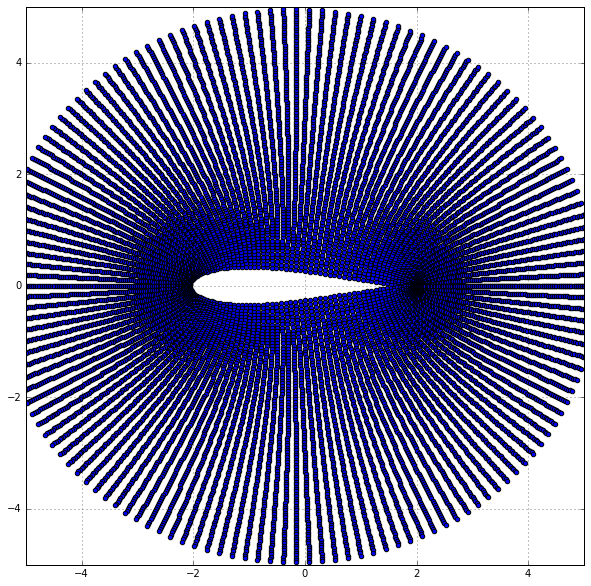

In [14]:
xi = z+c**2/z
#plot the grids on xi plane
size = 10
x_start, x_end = -5, 5
y_start, y_end = -5, 5
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.grid(True)
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.scatter(xi.real, xi.imag)

# Flow over a symmetric Joukowski airfoil with zero angle of attack

Stream function and streamlines


In [27]:
u_inf = 1
kappa = 2*np.pi*(0.15+c)**2*u_inf
#For cylinder radius Radius, a doublet of strength kappa is needed.
x_doublet, y_doublet = -0.15, 0

In [28]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2   
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)   
    return psi

In [29]:
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, z.real, z.imag)
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, z.real, z.imag)
u_freestream = u_inf * np.ones((Ntheta, Nr), dtype=float)
v_freestream = np.zeros((Ntheta, Nr), dtype=float)
psi_freestream = u_inf * z.imag

In [30]:
#superposition
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

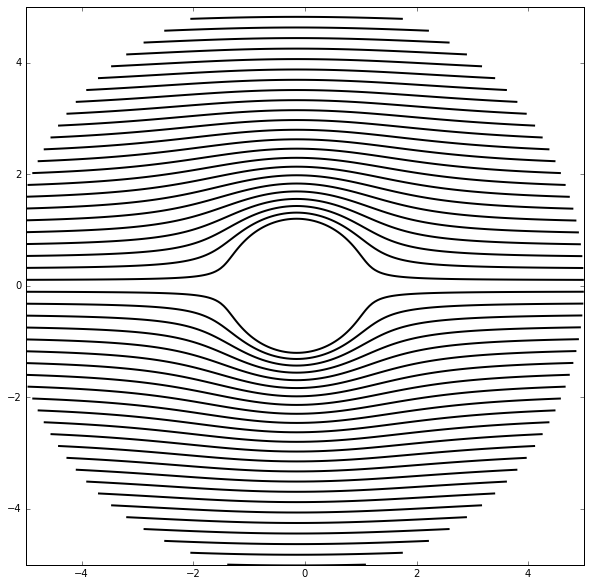

In [37]:
# plot the streamlines on z plane
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.contour(z.real, z.imag, psi, levels = np.linspace(-10,10,100), colors='Black', linewidths=2, linestyles='solid')

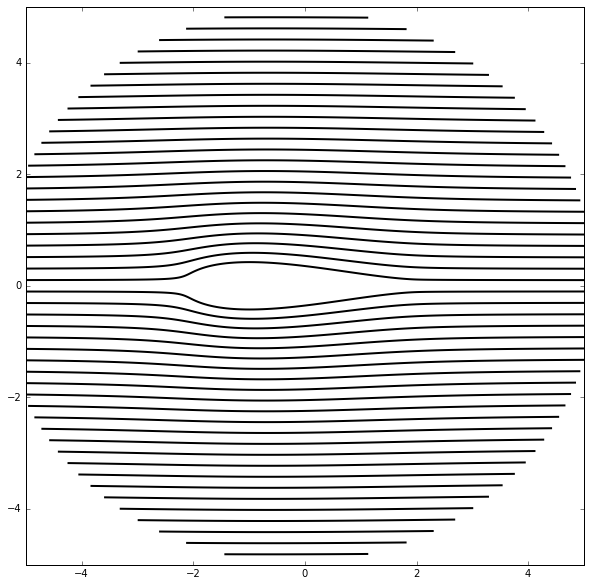

In [35]:
# plot the streamlines on xi plane
size = 10
pt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pt.xlim(x_start, x_end)
pt.ylim(y_start, y_end)
pt.contour(xi.real, xi.imag, psi, levels = np.linspace(-10,10,100), colors='Black', linewidths=2, linestyles='solid')